<a href="https://colab.research.google.com/github/Giffy/CarCrashDetector/blob/master/4_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index
<ol>
    <li><a href="#system _setup">System setup</a>
    <li><a href="#load_train">Load pre-trained ResNet</a>
    <li><a href="#pred_batch">Prediction batch processing</a>
    

<br>
<a id="system_setup"> </a>
# 1. System setup

## 1.1 Link Goggle Drive with Colab 

Run the code and follow the link to get an authentification key, copy it and paste in the box that will appear in jupyter notebook. 


In [1]:
# Check is Link to Drive is OK
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/GDrive/
Connection to Google drive successful


## 1.2 Install and update python libraries
Set up of Python, installing the required modules
<ol>
   <li>Updated python package manager (pip)
   <li>Torchvision
   <li>Pillow 4.0.0 (required for fastai library)
   <li>Image
   <li>Fast ai 0.7.0
   <li>Torchtext 0.2.3

In [2]:
!pip install --upgrade pip  > /dev/null
!pip install scipy==1.0.0 > /dev/null
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
!pip install Pillow==4.1.1 > /dev/null
!pip install matplotlib 3.0.2
!pip install image  > /dev/null
!pip install fastai==0.7.0  > /dev/null
!apt update && apt install -y libsm6 libxext6 > /dev/null
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 397.4MB 93.7MB/s 
    100% |████████████████████████████████| 61kB 2.2MB/s 
    100% |████████████████████████████████| 2.0MB 14.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Could not find a version that satisfies the requirement 3.0.2 (from versions: )
No matching distribution found for 3.0.2
mizani 0.5.2 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 2.1.2 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InR

<br>
<a id="load_train"> </a>
# 2. Load pre-trained ResNet Model

## 2.1 Libraries setup
Import the fastai libraries

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import sys

## 2.2 Load model


In [0]:
###   Add here the name of the model to test
model_name = "carCrash180614-1506_sz299_bs60_ep5"

In [6]:
arch=resnet34
sz = 299                                                                        # Type same size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
batch_size = 60                                                                 # Type same batch_size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=batch_size)     
learn = ConvLearner.pretrained(arch, data, precompute=True)


print ( "Loading model:", model_name,".h5\n")
learn.load(model_name)
print ( "Model loaded")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 18944882.52it/s]


Loading model: carCrash180614-1506_sz299_bs60_ep5 .h5

Model loaded


## 2.3 Load image to test

(360, 640, 3)


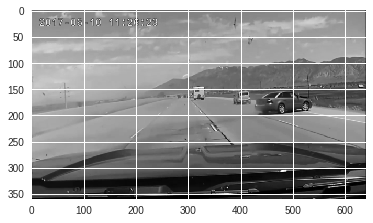

In [7]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/train/no_accident/"
fn = "4frame60.png"

PATH = "GDrive/My Drive/CarCrashDetection/Dataset/train/accident/"
fn = "frame0020.png"

img = open_image(PATH+fn)

print(img.shape)
plt.imshow(img);

## 2.4 Prediction Test

In [8]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)      # get transformations
im = val_tfms (img)

learn.precompute=False                             # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds)                                   # preds are log probabilities of classes

1

<br>
<a id="pred_batch"> </a>
# 3. Prediction Batch processing Test

## 3.1 Define test bench folder to check

In [9]:
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames1-noaccident/"
PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames4-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames5-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames9-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames10-noaccident/"

#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames2-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames3-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames6-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames7-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames8-accident/"


#filenames_to_check = !ls -tr {PATH} 


filenames_to_check = os.listdir ("GDrive/My Drive/CarCrashDetection/video_to_check/frames4-noaccident/")
number_images = len(filenames_to_check)
print(f"Number of images to check: {number_images}")

Number of images to check: 44


## 3.2 Prediction

In [10]:
count = 0
list = []
for i in range(number_images):
  fn = filenames_to_check[i]
  img = open_image(PATH+fn)
  trn_tfms, val_tfms = tfms_from_model(arch,sz)      
  im = val_tfms (img)

  learn.precompute=False                             
  preds = learn.predict_array(im[None])
  p = np.argmax(preds)       
  list.append(p)
  count += 1 
  if (count%5):    
    b = round((count*100 / number_images),0)
    sys.stdout.write('\r'+ str(b) + "%")

print ("")
print ("Imagenes procesadas :", count)
print ("Tentative number of no accidents :", list.count(1))
print ("Tentative number of accidents :", list.count(0))

100.0%
Imagenes procesadas : 44
Tentative number of no accidents : 44
Tentative number of accidents : 0


## 3.3 Prediction normalization

In [0]:
# normalization setup
seg_lenght = 5      # Segment lenght to analize
steps = 4           # number of steps between length
positivos = 2       # number of '0's in the lenght

In [0]:
list_normalized = []


for i in range(0, (len(list)-(steps+1)), steps):                 # iterates the prediction list according the steps
  norm = 0
  for j in range (seg_lenght):
    posicion = i+j
    norm = norm + list[posicion]

  if (norm>positivos):
    list_normalized.append(1)
  else:
    list_normalized.append(0)

In [13]:
print (list)
print (list_normalized)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## 3.4 Resultado

In [14]:
count = 0
accidente = 0
for i in range( len (list_normalized)):
  if (count == 3):
    accidente = 1
    break
  else:
    if (list_normalized[i] == 1):
      count == 0
    else:
      count +=1
if (accidente == 0):
  print ("No accident in video")
else:
  print ("Warning, accident")    

No accident in video
